In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
from ast import literal_eval
import opto_util as opto

from matplotlib.ticker import FormatStrFormatter
import importlib


mpl.style.use('classic')
%matplotlib inline
plt.rcParams.update({
    'font.sans-serif': 'arial',
    'font.family': 'sans-serif'
})

In [11]:
full_df=pd.read_csv('20210415_full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,24,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
##interneurons were clustered according to intrinsic electrophysiological properties using k-means clustering
##based on comparison to published features and genetic labeling in a subset of cells in this dataset, 
##cluster 0 ~ sst, cluster 1 ~ pvalb/fsi, cluster 2 ~ vip
intKclusters=pd.read_csv('interneuron_Kclusters_1203.csv')
full_df = pd.merge(full_df, intKclusters,  how='left', left_on=['exp_id','headstage'], right_on = ['experiment','headstage'])
full_df.Kcluster.unique()

array([ 1., nan,  0.,  2.])

In [13]:
Cs_internal=full_df[full_df.internal=='Cs']
burst_df=full_df[full_df.notes=='burst']
unchecked_df=full_df[full_df.notes=='pr']
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]
print (np.shape(standard_df))


(16286, 85)


In [14]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]
Cux2Kv=standard_df[(standard_df.presynapticCre=='Cux2') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Cux2ERKv=standard_df[(standard_df.presynapticCre=='Cux2-ERT2') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']

In [72]:
importlib.reload(opto)

<module 'opto_util' from '/Users/travish/Desktop/2p_opto_nbs/opto_util.py'>

In [22]:
bins=np.arange(0,501,100)
Penk_L23pyr=PenkKv[(PenkKv.post_class=='pyramidal') & (PenkKv.post_layer==2)]
Penk_L23int=PenkKv[(PenkKv.post_class=='interneuron') & (PenkKv.post_layer==2)]
Penk_L23fsi=Penk_L23int[Penk_L23int.Kcluster==1]
Penk_L23vip=Penk_L23int[Penk_L23int.Kcluster==2]

Penk_L23pyr_con=opto.connectivity_profile(Penk_L23pyr, 'xyz_dist', bins=bins)
bins=np.arange(0,501,100)
Penk_L23int_con=opto.connectivity_profile(Penk_L23int, 'xyz_dist', bins=bins)
Penk_L23fsi_con=opto.connectivity_profile(Penk_L23fsi, 'xyz_dist', bins=bins)
Penk_L23vip_con=opto.connectivity_profile(Penk_L23vip, 'xyz_dist', bins=bins)


/Users/travish/Desktop/2p_opto_nbs/opto_util.py:16: RuntimeWarning: invalid value encountered in true_divide
  exc_frac=exc_hist.astype(float)/probed_hist.astype(float)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:18: RuntimeWarning: invalid value encountered in true_divide
  direct_frac=direct_hist.astype(float)/probed_hist.astype(float)
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:20: RuntimeWarning: invalid value encountered in true_divide
  inh_frac=inh_hist.astype(float)/probed_hist.astype(float)


In [23]:
## count the number of patch L23 pyr's in  Penk experiments that were Penk+
patched=Penk_L23pyr.groupby(['exp_id', 'headstage'])
pos=0
neg=0
for name, group in patched:
    
    cell_reporter=group.post_reporter.unique()

    if cell_reporter[0]=='positive':
        pos+=1
    else:
        neg+=1
print (pos, neg)


2 23


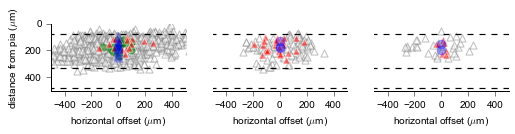

In [25]:

fig,axes = plt.subplots(1,3)
x_lim=[-500,500]
y_lim=[500,0]
fs=10
tick_size=5
font='arial'
ax=axes[0]
opto.graph_map_subplot(ax, Penk_L23pyr, 'excitatory', 'red', '^', 'blue', '^')
opto.graph_selected(ax,Penk_L23pyr,'direct','green','o',pre_size=50)
opto.layer_borders(ax)
ax.set_xlim(x_lim)

ax.set_ylim(y_lim)

ax.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([0,200,400])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.set_aspect(aspect='equal',adjustable='box')
ax1=axes[1]
opto.graph_map_subplot(ax1, Penk_L23fsi, 'excitatory','red', '^', 'blue', 'o')
opto.layer_borders(ax1)
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.axes.yaxis.set_visible(False)

ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.set_aspect(aspect='equal',adjustable='box')

ax2=axes[2]
opto.graph_map_subplot(ax2, Penk_L23vip, 'excitatory','red', '^', 'blue', 'o')
opto.layer_borders(ax2)
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.axes.yaxis.set_visible(False)

ax2.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.set_aspect(aspect='equal',adjustable='box')

fig.set_figwidth(8.2)
#plt.savefig('Penk_L23_maps.svg')


In [27]:
df_list=[Penk_L23pyr, Penk_L23fsi, Penk_L23vip]
for df in df_list:
    opto.print_counts(df)

895  probed cnxs
16  exc cnxs
0  inh cnxs
25 postsyanptic cells
125  probed cnxs
28  exc cnxs
0  inh cnxs
3 postsyanptic cells
43  probed cnxs
7  exc cnxs
0  inh cnxs
2 postsyanptic cells


In [30]:
## MP.npz contains MultiPatch/paired recording data pulled from the AIBS multipatch database
MP=np.load('MP.npz')

probed 1:  [135  48   0   2   0]
called 1:  [8 2 0 0 0]
probed 2:  [205 312 175 103  56]
called 2:  [12  3  1  0  0]


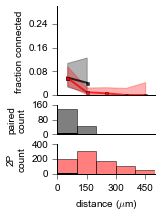

In [40]:

df=Penk_L23pyr
column_name='xyz_dist'
calls=['excitatory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
bins=np.arange(0,501,100)

probed1=MP['l23pyr_l23pyr_d']*1e6
cnx1=MP['l23pyr_l23pyr_d'][MP['l23pyr_l23pyr_syn']]*1e6

probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,5,ymax=0.3)



probed 1:  [28 27  3  0  0]
called 1:  [13  8  0  0  0]
probed 2:  [41 60 23  1  0]
called 2:  [19  9  0  0  0]


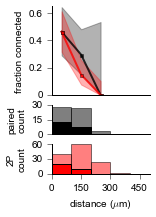

In [41]:

df=Penk_L23fsi

df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23pyr_l23pv_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23pyr_l23pv_d'][MP['l23pyr_l23pv_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,2,ymax=0.65)


probed 1:  [25 28  4  0  0]
called 1:  [6 4 0 0 0]
probed 2:  [24 11  8  0  0]
called 2:  [7 0 0 0 0]


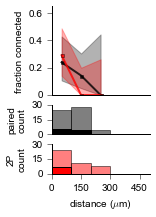

In [43]:

df=Penk_L23vip
column_name='xyz_dist'

df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23pyr_l23vip_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23pyr_l23vip_d'][MP['l23pyr_l23vip_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,2,ymax=0.65)


In [44]:
df1=Penk_L23pyr
df2=Penk_L23fsi
df3=Penk_L23vip
df_list=[df1,df2,df3]
name_list=['pyr', 'fsi', 'vip']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
i,j=0,0

bins=[0,100,200,300]
for df in df_list:
    
    table=np.zeros([2,3])
    probed=df[df.cnx.isin(probed_calls)].xyz_dist
    exc=df[df.cnx=='excitatory'].xyz_dist
    probed_hist, x=np.histogram(probed, bins=bins)
    exc_hist, x=np.histogram(exc, bins=bins)
    print (name_list[i])

    #print float(cnx_num)/p_num
    table[0]=exc_hist
    table[1]=probed_hist-exc_hist
    i+=1
    print (table)
    print (stats.chi2_contingency(table))

pyr
[[ 12.   3.   1.]
 [193. 309. 174.]]
(16.250971829260365, 0.00029590091253568074, 2, array([[  4.73988439,   7.21387283,   4.04624277],
       [200.26011561, 304.78612717, 170.95375723]]))
fsi
[[19.  9.  0.]
 [22. 51. 23.]]
(21.921653600464577, 1.73689435449382e-05, 2, array([[ 9.25806452, 13.5483871 ,  5.19354839],
       [31.74193548, 46.4516129 , 17.80645161]]))
vip
[[ 7.  0.  0.]
 [17. 11.  8.]]
(6.619212962962965, 0.036530546372098176, 2, array([[ 3.90697674,  1.79069767,  1.30232558],
       [20.09302326,  9.20930233,  6.69767442]]))


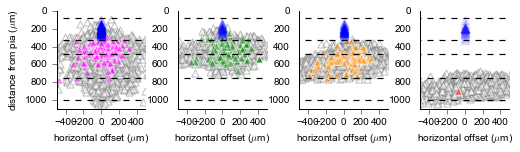

In [49]:

fig,axes = plt.subplots(1,4)
x_lim=[-500,500]
y_lim=[1100,0]
fs=10
tick_size=5
font='arial'

df_list=[RorbAi167,RorbKv,Tlx3Kv,Ntsr1]
colors=['magenta', 'green','darkorange','red']
i=0

for df in df_list:
    
    ax=axes[i]
    color=colors[i]
    df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
    cnx=df[df.cnx=='excitatory']
    opto.graph_map_subplot(ax, df, 'excitatory', color, '^', 'blue', '^')
    opto.layer_borders(ax)
    ax.set_xlim(x_lim)

    ax.set_ylim(y_lim)

    
    ax.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 0:
        ax.yaxis.set_ticks([0,200,400,600,800,1000])
        ax.yaxis.set_ticks_position('left')
        ax.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
    else:
        ax.yaxis.set_ticks_position('none') 
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
    ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
    ax.set_aspect(aspect='equal',adjustable='box')
    i+=1



fig.set_figwidth(7)

fig.tight_layout(pad=0.1)



In [50]:

bins=np.arange(50,1101,100)
RorbAi167_L23pyr=RorbAi167[(RorbAi167.post_layer==2) & (RorbAi167.post_class=='pyramidal')]
RorbKv_L23pyr=RorbKv[(RorbKv.post_layer==2) & (RorbKv.post_class=='pyramidal')]
Rorb_L23pyr=Rorb[(Rorb.post_layer==2) & (Rorb.post_class=='pyramidal')]
Tlx3Kv_L23pyr=Tlx3Kv[(Tlx3Kv.post_layer==2) & (Tlx3Kv.post_class=='pyramidal')]
Ntsr1Ai_L23pyr=Ntsr1[(Ntsr1.post_layer==2) & (Ntsr1.post_class=='pyramidal')]
Ntsr1Ai_L23fsi=Ntsr1[(Ntsr1.post_layer==2) & (Ntsr1.Kcluster==1)]
Scnn1a_L23pyr=Scnn1a[(Scnn1a.post_layer==2) & (Scnn1a.post_class=='pyramidal')]

RorbAi_L23pyr_con=opto.connectivity_profile(RorbAi167_L23pyr[RorbAi167_L23pyr.abs_x<300], 'y_pia', bins=bins)
RorbKv_L23pyr_con=opto.connectivity_profile(RorbKv_L23pyr[RorbKv_L23pyr.abs_x<300], 'y_pia', bins=bins)
Rorb_L23pyr_con=opto.connectivity_profile(Rorb_L23pyr[Rorb_L23pyr.abs_x<300], 'y_pia', bins=bins)
Tlx3Kv_L23pyr_con=opto.connectivity_profile(Tlx3Kv_L23pyr[Tlx3Kv_L23pyr.abs_x<300], 'y_pia', bins=bins)
Ntsr1Ai_L23pyr_con=opto.connectivity_profile(Ntsr1Ai_L23pyr[Ntsr1Ai_L23pyr.abs_x<300], 'y_pia', bins=bins)
PenkKv_L23pyr_con=opto.connectivity_profile(Penk_L23pyr[Penk_L23pyr.abs_x<300],'y_pia', bins=bins)
Scnn1a_L23pyr_con=opto.connectivity_profile(Scnn1a_L23pyr[Scnn1a_L23pyr.abs_x<300],'y_pia', bins=bins)

/Users/travish/Desktop/2p_opto_nbs/opto_util.py:16: RuntimeWarning: invalid value encountered in true_divide
  exc_frac=exc_hist.astype(float)/probed_hist.astype(float)
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:18: RuntimeWarning: invalid value encountered in true_divide
  direct_frac=direct_hist.astype(float)/probed_hist.astype(float)
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:20: RuntimeWarning: invalid value encountered in true_divide
  inh_frac=inh_hist.astype(float)/probed_hist.astype(float)


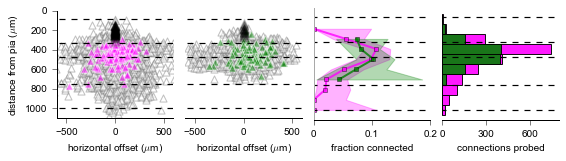

In [56]:
gskw = dict(width_ratios=[2,2,2,2], wspace=0.1)

gs = matplotlib.gridspec.GridSpec(1,4, **gskw)
mp=20
fig = plt.figure(figsize=(9,2))

ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax1, RorbAi167_L23pyr, 'excitatory', 'magenta', '^', 'black', '^')
opto.layer_borders(ax1)
ax1.axis([-600,600,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-500,0,500])

ax2=fig.add_subplot(gs[1], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax2, RorbKv_L23pyr, 'excitatory', 'green', '^', 'black', '^')
opto.layer_borders(ax2)
ax2.axis([-600,600,1100,0])
ax2.axes.yaxis.set_visible(False)
ax2.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([-500,0,500])
ax3=fig.add_subplot(gs[2])
opto.rate_ci_probed_cnx_y(ax3,'magenta', RorbAi_L23pyr_con['midX'], RorbAi_L23pyr_con['probed_hist'], RorbAi_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax3,'green', RorbKv_L23pyr_con['midX'], RorbKv_L23pyr_con['probed_hist'], RorbKv_L23pyr_con['exc_hist'], min_probed=mp)
opto.layer_borders(ax3)
ax3.plot([0,0],[1100,0], lw=1,c='darkgrey')
ax3.axis([0,0.2,1100,0])
ax3.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax3.xaxis.set_ticks([0,0.1,0.2])
ax3.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax3.axes.yaxis.set_visible(False)

ax4=fig.add_subplot(gs[3])
df1=RorbAi167_L23pyr.dropna(subset=['y_pia'])
df1=df1[df1.abs_x<300]
df2=df2[df2.abs_x<300]
df2=RorbKv_L23pyr.dropna(subset=['y_pia'])
ax4.hist(df1.y_pia, color='magenta', bins=bins,alpha=0.9,density=False,cumulative=False,orientation='horizontal')
ax4.hist(df2.y_pia, color='green', bins=bins,alpha=0.9,density=False,cumulative=False,orientation='horizontal')
opto.layer_borders(ax4,max_x=1000)
ax4.axis([0,800,1100,0])
ax4.set_xlabel('connections probed', fontsize=fs, fontname=font)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('none')
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax4.axes.yaxis.set_visible(False)
ax4.xaxis.set_major_locator(plt.MaxNLocator(3))


In [64]:
df1=Tlx3Kv_L23pyr
df2=Tlx3Kv_L23pyr[(Tlx3Kv_L23pyr.abs_x<300) & (Tlx3Kv_L23pyr.y_pia>480) & (Tlx3Kv_L23pyr.y_pia<750)]
df3=Rorb_L23pyr[(Rorb_L23pyr.abs_x<300) & (Rorb_L23pyr.y_pia>480) & (Rorb_L23pyr.y_pia<750)]

df_list=[df1,df2,df3]
name_list=['Tlx3', 'L5 Tlx3_win300', 'L5 Rorb_win300']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
i,j=0,0
table=np.zeros([2,3])
for df in df_list:
    #df=df[(df.y_pia>480) & (df.y_pia<750)]
    
    probed=df[df.cnx.isin(probed_calls)]
    exc=df[df.cnx=='excitatory']
    p_num=np.shape(probed)[0]
    cnx_num=np.shape(exc)[0]
    print (name_list[i])
    print (p_num, "connections tested")
    print (cnx_num, "connections found")
    print ("connection prob.: ",float(cnx_num)/p_num)
    table[0,i]=cnx_num
    table[1,i]=p_num-cnx_num
    i+=1

#print stats.fisher_exact(table)

Tlx3
1724 connections tested
86 connections found
connection prob.:  0.04988399071925754
L5 Tlx3_win300
1052 connections tested
61 connections found
connection prob.:  0.05798479087452472
L5 Rorb_win300
1028 connections tested
71 connections found
connection prob.:  0.06906614785992218


In [65]:

df_list=[Tlx3Kv_L23pyr, Ntsr1Ai_L23pyr]
for df in df_list:
    opto.print_counts(df)

1724  probed cnxs
86  exc cnxs
0  inh cnxs
46 postsyanptic cells
1145  probed cnxs
1  exc cnxs
0  inh cnxs
23 postsyanptic cells


In [66]:
exc_L23_fsi=standard_df[(standard_df.Kcluster==1) & (standard_df.post_layer==2)]
exc_L23_fsi=exc_L23_fsi[exc_L23_fsi.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]

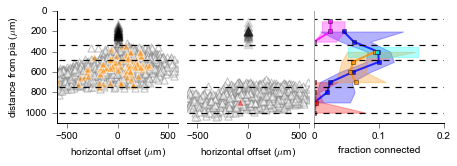

In [68]:

gskw = dict(width_ratios=[2,2,2], wspace=0.01)

gs = matplotlib.gridspec.GridSpec(1,3, **gskw)
mp=24
fig = plt.figure(figsize=(7,2))

ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax1, Tlx3Kv_L23pyr, 'excitatory', 'darkorange', '^', 'black', '^')
opto.layer_borders(ax1)
ax1.axis([-600,600,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-500,0,500])

ax2=fig.add_subplot(gs[1], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax2, Ntsr1Ai_L23pyr, 'excitatory', 'red', '^', 'black', '^')
opto.layer_borders(ax2)
ax2.axis([-600,600,1100,0])
ax2.axes.yaxis.set_visible(False)
ax2.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([-500,0,500])
ax3=fig.add_subplot(gs[2])
opto.rate_ci_probed_cnx_y(ax3, 'blue', Rorb_L23pyr_con['midX'], Rorb_L23pyr_con['probed_hist'], Rorb_L23pyr_con['exc_hist'], min_probed=mp)

opto.rate_ci_probed_cnx_y(ax3,'darkorange', Tlx3Kv_L23pyr_con['midX'], Tlx3Kv_L23pyr_con['probed_hist'], Tlx3Kv_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax3,'red', Ntsr1Ai_L23pyr_con['midX'], Ntsr1Ai_L23pyr_con['probed_hist'], Ntsr1Ai_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax3, 'magenta', PenkKv_L23pyr_con['midX'], PenkKv_L23pyr_con['probed_hist'], PenkKv_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax3, 'cyan', Scnn1a_L23pyr_con['midX'], Scnn1a_L23pyr_con['probed_hist'], Scnn1a_L23pyr_con['exc_hist'], min_probed=mp)

opto.layer_borders(ax3)
ax3.plot([0,0],[1100,0], lw=1,c='darkgrey')
ax3.axis([0,0.2,1100,0])
ax3.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax3.xaxis.set_ticks([0,0.1,0.2])
ax3.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax3.axes.yaxis.set_visible(False)
#plt.savefig('Tlx3Ntrs1_L23_maps.svg')

In [76]:
binsize=100
bins=np.arange(50,1001,binsize)
exc_L23_int=standard_df[(standard_df.post_class=='interneuron') & (standard_df.post_layer==2)]
exc_L23_int=exc_L23_int[exc_L23_int.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]

exc_L23_fsi=standard_df[(standard_df.Kcluster==1) & (standard_df.post_layer==2)]
exc_L23_fsi=exc_L23_fsi[exc_L23_fsi.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]

exc_L23_sst=standard_df[(standard_df.Kcluster==0) & (standard_df.post_layer==2)]
exc_L23_sst=exc_L23_sst[exc_L23_sst.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]

exc_L23_vip=standard_df[(standard_df.Kcluster==2) & (standard_df.post_layer==2)]
exc_L23_vip=exc_L23_vip[exc_L23_vip.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]

exc_L23_pyr=standard_df[(standard_df.post_class=='pyramidal') & (standard_df.post_layer==2)]
exc_L23_pyr=exc_L23_pyr[exc_L23_pyr.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]

color_dict={'Scnn1a':'blue', 'Rorb':'blue', 'Tlx3':'darkorange', 'Ntsr1':'red', 'Penk':'magenta', 'Sst':'green','Pvalb':'purple'}

exc_L23int_con=opto.connectivity_profile(exc_L23_int[exc_L23_int.abs_x<=300],'y_pia',bins)
exc_L23fsi_con=opto.connectivity_profile(exc_L23_fsi[exc_L23_fsi.abs_x<=300],'y_pia',bins)
exc_L23sst_con=opto.connectivity_profile(exc_L23_sst[exc_L23_sst.abs_x<=300],'y_pia',bins)
exc_L23vip_con=opto.connectivity_profile(exc_L23_vip[exc_L23_vip.abs_x<=300],'y_pia',bins)
exc_L23pyr_con=opto.connectivity_profile(exc_L23_pyr[exc_L23_pyr.abs_x<=300],'y_pia',bins)

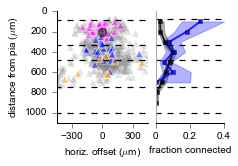

In [77]:

gskw = dict(width_ratios=[4,3], wspace=0.1)
gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
fs=10
mp=10
fig = plt.figure(figsize=(3,2))

ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
opto.graph_map_subplot_color_dict(ax1, exc_L23_fsi, 'excitatory', color_dict, '^', 'black', 'o')
opto.layer_borders(ax1)
ax1.axis([-450,450,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horiz. offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-300,0,300])


ax2=fig.add_subplot(gs[1])
opto.rate_ci_probed_cnx_y(ax2,'black', exc_L23pyr_con['midX'], exc_L23pyr_con['probed_hist'], exc_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax2,'blue', exc_L23fsi_con['midX'], exc_L23fsi_con['probed_hist'], exc_L23fsi_con['exc_hist'], min_probed=mp)

opto.layer_borders(ax2)
ax2.plot([0,0],[1100,0], lw=1,c='darkgrey')
ax2.axis([0,0.4,1100,0])
ax2.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([0,0.2,0.4])
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax2.axes.yaxis.set_visible(False)



[18.759   4.2188  1.4062  1.5        nan]


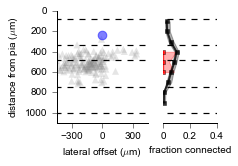

In [82]:

gskw = dict(width_ratios=[4,2], wspace=0.1)
gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
mp=20
fig = plt.figure(figsize=(3,2))

ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
opto.graph_map_subplot_color_dict(ax1, exc_L23_sst, 'excitatory', color_dict, '^', 'blue', 'o')
opto.layer_borders(ax1)
ax1.axis([-450,450,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'lateral offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-300,0,300])


ax2=fig.add_subplot(gs[1])
opto.rate_ci_probed_cnx_y(ax2,'black', exc_L23pyr_con['midX'], exc_L23pyr_con['probed_hist'], exc_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax2,'red', exc_L23sst_con['midX'], exc_L23sst_con['probed_hist'], exc_L23sst_con['exc_hist'], min_probed=mp)

opto.layer_borders(ax2)
ax2.axis([0,0.4,1100,0])
ax2.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([0,0.2,0.4])
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax2.axes.yaxis.set_visible(False)

print (exc_L23_sst.oneP.unique())

[30.781   12.675   27.681    9.25     0.09375]


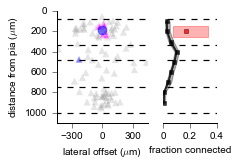

In [83]:

gskw = dict(width_ratios=[4,2], wspace=0.1)
gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
mp=20
fig = plt.figure(figsize=(3,2))

ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
opto.graph_map_subplot_color_dict(ax1, exc_L23_vip, 'excitatory', color_dict, '^', 'blue', 'o')
opto.layer_borders(ax1)
ax1.axis([-450,450,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'lateral offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-300,0,300])


ax2=fig.add_subplot(gs[1])
opto.rate_ci_probed_cnx_y(ax2,'black', exc_L23pyr_con['midX'], exc_L23pyr_con['probed_hist'], exc_L23pyr_con['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_y(ax2,'red', exc_L23vip_con['midX'], exc_L23vip_con['probed_hist'], exc_L23vip_con['exc_hist'], min_probed=mp)

opto.layer_borders(ax2)
ax2.axis([0,0.4,1100,0])
ax2.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([0,0.2,0.4])
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax2.axes.yaxis.set_visible(False)

print (exc_L23_vip.oneP.unique())

/Users/travish/Desktop/2p_opto_nbs/opto_util.py:22: RuntimeWarning: invalid value encountered in true_divide
  return {'midX':midPoints(x),'probed_hist':probed_hist,'exc_hist':exc_hist,'inh_hist':inh_hist,'direct':direct_hist,
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:24: RuntimeWarning: invalid value encountered in true_divide
  
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:26: RuntimeWarning: invalid value encountered in true_divide
  def hist_of_call(df, call, column_name, bins):


Text(0.5, 0, 'horizontal distance ($\\mu$m)')

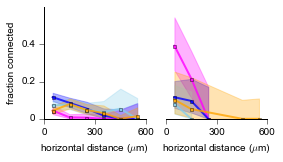

In [87]:

bins=np.arange(0,601,100)
mp=14
Penk_L23pyr_lat=opto.connectivity_profile(Penk_L23pyr, 'abs_x',bins)
RorbL4_L23pyr_lat=opto.connectivity_profile(Rorb_L23pyr[(Rorb_L23pyr.y_pia<480) & (Rorb_L23pyr.y_pia>330)],'abs_x',bins)
RorbL5_L23pyr_lat=opto.connectivity_profile(Rorb_L23pyr[(Rorb_L23pyr.y_pia>480) & (Rorb_L23pyr.y_pia<750)],'abs_x',bins)
Tlx3L5_L23pyr_lat=opto.connectivity_profile(Tlx3Kv_L23pyr[(Tlx3Kv_L23pyr.y_pia>480)],'abs_x',bins)

Rorb_L23fsi=Rorb[(Rorb.Kcluster==1) & (Rorb.post_layer==2)]
Tlx3_L23fsi=Tlx3Kv[(Tlx3Kv.Kcluster==1) & (Tlx3Kv.post_layer==2)]

Penk_L23fsi_lat=opto.connectivity_profile(Penk_L23fsi, 'abs_x',bins)
RorbL4_L23fsi_lat=opto.connectivity_profile(Rorb_L23fsi[(Rorb_L23fsi.y_pia<480) & (Rorb_L23fsi.y_pia>330)],'abs_x',bins)
RorbL5_L23fsi_lat=opto.connectivity_profile(Rorb_L23fsi[(Rorb_L23fsi.y_pia>480) & (Rorb_L23fsi.y_pia<750)],'abs_x',bins)
Tlx3L5_L23fsi_lat=opto.connectivity_profile(Tlx3_L23fsi[(Tlx3_L23fsi.y_pia>480)],'abs_x',bins)

gskw = dict(width_ratios=[1,1], wspace=0.2) #

gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
fig = plt.figure(figsize=(4,2))

ax1=fig.add_subplot(gs[0])
opto.rate_ci_probed_cnx_x(ax1, 'magenta', Penk_L23pyr_lat['midX'], Penk_L23pyr_lat['probed_hist'], Penk_L23pyr_lat['exc_hist'], min_probed=mp)

opto.rate_ci_probed_cnx_x(ax1, 'blue', RorbL4_L23pyr_lat['midX'], RorbL4_L23pyr_lat['probed_hist'], RorbL4_L23pyr_lat['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax1, 'skyblue', RorbL5_L23pyr_lat['midX'], RorbL5_L23pyr_lat['probed_hist'], RorbL5_L23pyr_lat['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax1, 'orange', Tlx3L5_L23pyr_lat['midX'], Tlx3L5_L23pyr_lat['probed_hist'], Tlx3L5_L23pyr_lat['exc_hist'], min_probed=mp)
ax1.axis([0,600,0,0.60])
ax1.yaxis.set_ticks([0,0.2,0.4])

ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax1.xaxis.set_ticks([0,300,600])
ax1.set_ylabel('fraction connected', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)
ax2=fig.add_subplot(gs[1])

opto.rate_ci_probed_cnx_x(ax2, 'magenta', Penk_L23fsi_lat['midX'], Penk_L23fsi_lat['probed_hist'], Penk_L23fsi_lat['exc_hist'], min_probed=mp)

opto.rate_ci_probed_cnx_x(ax2, 'blue', RorbL4_L23fsi_lat['midX'], RorbL4_L23fsi_lat['probed_hist'], RorbL4_L23fsi_lat['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'skyblue', RorbL5_L23fsi_lat['midX'], RorbL5_L23fsi_lat['probed_hist'], RorbL5_L23fsi_lat['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'orange', Tlx3L5_L23fsi_lat['midX'], Tlx3L5_L23fsi_lat['probed_hist'], Tlx3L5_L23fsi_lat['exc_hist'], min_probed=mp)
ax2.axis([0,600,0,0.50])
ax2.axes.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([0,300,600])
ax2.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)
#plt.savefig('exc_cnx_lat_off.svg')

/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/195472912.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  current_cmap.set_bad(color='black')
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/195472912.py:27: RuntimeWarning: invalid value encountered in true_divide
  H_prob=H_cnx/H


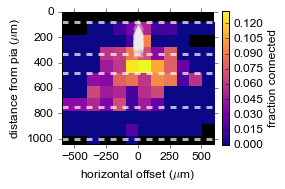

In [90]:
df=exc_L23_pyr.dropna(subset=['y_pia'])


probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df_probed=df[df.cnx.isin(probed_calls)]
df_cnx=df[df.cnx=='excitatory']
min_x=-600
max_x=600
min_y=80
max_y=1080
binsize_x=100
binsize_y=100
xedges = range(min_x,max_x+1,binsize_x)
yedges = range(min_y,max_y+1,binsize_y)

H, xedges, yedges = np.histogram2d(df_probed.x_ap, df_probed.y_pia, bins=(xedges, yedges))

threshold=H >4
H=H*threshold
H = H.T
H_cnx, xedges, yedges = np.histogram2d(df_cnx.x_ap,df_cnx.y_pia, bins=(xedges, yedges))
H_cnx=H_cnx*threshold
H_cnx = H_cnx.T
fig, ax = plt.subplots()
current_cmap = matplotlib.cm.plasma
current_cmap.set_bad(color='black')
H_prob=H_cnx/H
plt.imshow(H_prob, interpolation='nearest',filterrad=1, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)

plt.xlabel(r'horizontal offset ($\mu$m)', fontsize=12, fontname='arial')
plt.ylabel(r'distance from pia ($\mu$m)', fontsize=12, fontname='arial')
plt.axis([min_x, max_x, 1040, 0])
ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=12, direction='out')
plt.yticks(fontname = "arial")
plt.xticks([-500,-250,0,250,500],fontname= "arial")

plt.plot([-600,600],[80,80], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[330,330], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[480,480], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[750,750], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[1000,1000], c='white', ls='dashed', lw=3, alpha=0.7)

cb=plt.colorbar(fraction=0.04, pad=0.05)
cb.set_label('fraction connected', fontsize=12, fontname='arial')
cb.ax.tick_params(labelsize=12)
cells=df.groupby(['exp_id', 'headstage']).toPia.mean()
for cell in cells:
    plt.scatter(0,cell, marker='^', color='white', alpha=0.05, s=100)
fig.set_figheight(3)
fig.set_figwidth(3)


In [94]:

SstAi167_L23pyr=SstAi167[(SstAi167.post_layer==2) & (SstAi167.post_class=='pyramidal')]
SstKv_L23pyr=SstKv[(SstKv.post_layer==2) & (SstKv.post_class=='pyramidal')]
PvalbKv_L23pyr=PvalbKv[(PvalbKv.post_layer==2) & (PvalbKv.post_class=='pyramidal')]


bins=np.arange(80,1001,100)
#bins=[100,330,480,780,1100]
lat_lim=200
SstAi_L23pyr_con=opto.connectivity_profile(SstAi167_L23pyr[SstAi167_L23pyr.abs_x<=lat_lim],'y_pia',bins)
SstKv_L23pyr_con=opto.connectivity_profile(SstKv_L23pyr[SstKv_L23pyr.abs_x<=lat_lim],'y_pia',bins)
PvalbKv_L23pyr_con=opto.connectivity_profile(PvalbKv_L23pyr[PvalbKv_L23pyr.abs_x<=lat_lim],'y_pia',bins)


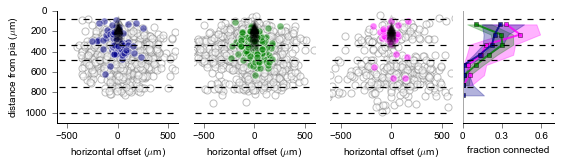

In [95]:
gskw = dict(width_ratios=[1,1,1,0.7], wspace=0.05) #
font='arial'
gs = matplotlib.gridspec.GridSpec(1,4, **gskw)
fs=10
min_probed=9
fig = plt.figure(figsize=(9,2))

ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')

opto.graph_map_subplot(ax1, PvalbKv_L23pyr, 'inhibitory', 'darkblue', 'o', 'black', '^')
opto.layer_borders(ax1)
ax1.axis([-600,600,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-500,0,500])

ax2=fig.add_subplot(gs[1], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax2, SstKv_L23pyr, 'inhibitory', 'green', 'o', 'black', '^')
opto.layer_borders(ax2)
ax2.axis([-600,600,1100,0])
ax2.axes.yaxis.set_visible(False)
ax2.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([-500,0,500])


ax3=fig.add_subplot(gs[2], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax3, SstAi167_L23pyr, 'inhibitory', 'magenta', 'o', 'black', '^')
opto.layer_borders(ax3)
ax3.axis([-600,600,1100,0])
ax3.axes.yaxis.set_visible(False)
ax3.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax3.xaxis.set_ticks([-500,0,500])


ax4=fig.add_subplot(gs[3])
opto.rate_ci_probed_cnx_y(ax4,'magenta', SstAi_L23pyr_con['midX'], SstAi_L23pyr_con['probed_hist'], SstAi_L23pyr_con['inh_hist'], min_probed=min_probed)
opto.rate_ci_probed_cnx_y(ax4,'green', SstKv_L23pyr_con['midX'], SstKv_L23pyr_con['probed_hist'], SstKv_L23pyr_con['inh_hist'], min_probed=min_probed)
opto.rate_ci_probed_cnx_y(ax4,'darkblue', PvalbKv_L23pyr_con['midX'], PvalbKv_L23pyr_con['probed_hist'], PvalbKv_L23pyr_con['inh_hist'], min_probed=min_probed)

opto.layer_borders(ax4)
ax4.plot([0,0],[1100,0], lw=1,c='darkgrey')
ax4.axis([0,0.7,1100,0])
ax4.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.yaxis.set_ticks_position('none')
ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax4.xaxis.set_ticks([0,0.3,0.6])
ax4.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax4.axes.yaxis.set_visible(False)
#plt.savefig('inh_L23_maps.svg')

In [98]:

SstAi167_L23fsi=SstAi167[(SstAi167.post_layer==2) & (SstAi167.Kcluster==1)]
SstKv_L23fsi=SstKv[(SstKv.post_layer==2) & (SstKv.Kcluster==1)]
PvalbKv_L23fsi=PvalbKv[(PvalbKv.post_layer==2) & (PvalbKv.Kcluster==1)]


SstAi_L23fsi_con=opto.connectivity_profile(SstAi167_L23fsi[SstAi167_L23fsi.abs_x<=lat_lim],'y_pia',bins)
SstKv_L23fsi_con=opto.connectivity_profile(SstKv_L23fsi[SstKv_L23fsi.abs_x<=lat_lim],'y_pia',bins)
PvalbKv_L23fsi_con=opto.connectivity_profile(PvalbKv_L23fsi[PvalbKv_L23fsi.abs_x<=lat_lim],'y_pia',bins)

/Users/travish/Desktop/2p_opto_nbs/opto_util.py:22: RuntimeWarning: invalid value encountered in true_divide
  return {'midX':midPoints(x),'probed_hist':probed_hist,'exc_hist':exc_hist,'inh_hist':inh_hist,'direct':direct_hist,
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:24: RuntimeWarning: invalid value encountered in true_divide
  
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:26: RuntimeWarning: invalid value encountered in true_divide
  def hist_of_call(df, call, column_name, bins):


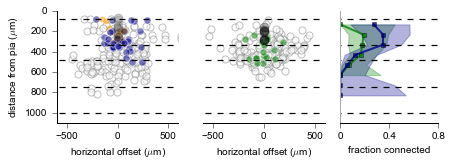

In [99]:
gskw = dict(width_ratios=[1,1,0.7], wspace=0.05) #

gs = matplotlib.gridspec.GridSpec(1,3, **gskw)

fig = plt.figure(figsize=(7,2))

min_probed=1


ax1=fig.add_subplot(gs[0], aspect='equal', adjustable='box')
opto.graph_map_subplot(ax1, PvalbKv_L23fsi, 'inhibitory', 'darkblue', 'o', 'black', 'o')
opto.graph_selected(ax1,PvalbKv_L23fsi,'direct','orange','o',pre_size=25)
opto.layer_borders(ax1)
ax1.axis([-600,600,1100,0])
ax1.set_ylabel(r'distance from pia ($\mu$m)', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks([0,200,400,600,800,1000])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.xaxis.set_ticks([-500,0,500])


ax2=fig.add_subplot(gs[1], aspect='equal', adjustable='box')

opto.graph_map_subplot(ax2, SstKv_L23fsi, 'inhibitory', 'green', 'o', 'black', 'o')
opto.layer_borders(ax2)
ax2.axis([-600,600,1100,0])
ax2.axes.yaxis.set_visible(False)
ax2.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([-500,0,500])


ax3=fig.add_subplot(gs[2])
#opto.rate_ci_probed_cnx_y(ax4,'magenta', SstAi_L23fsi_con['midX'], SstAi_L23fsi_con['probed_hist'], SstAi_L23fsi_con['inh_hist'], min_probed=3)
opto.rate_ci_probed_cnx_y(ax3,'green', SstKv_L23fsi_con['midX'], SstKv_L23fsi_con['probed_hist'], SstKv_L23fsi_con['inh_hist'], min_probed=min_probed)
opto.rate_ci_probed_cnx_y(ax3,'darkblue', PvalbKv_L23fsi_con['midX'], PvalbKv_L23fsi_con['probed_hist'], PvalbKv_L23fsi_con['inh_hist'], min_probed=min_probed)

opto.layer_borders(ax3)
ax3.plot([0,0],[1100,0], lw=1,c='darkgrey')
ax3.axis([0,0.8,1100,0])
ax3.set_xlabel('fraction connected', fontsize=fs, fontname=font)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax3.xaxis.set_ticks([0,0.4,0.8])
ax3.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax3.axes.yaxis.set_visible(False)
#plt.savefig('inh_L23fsi_maps.svg')

probed 1:  [38 22  1  2  0]
called 1:  [9 6 0 0 0]
probed 2:  [102 167  63  40  18]
called 2:  [45 39  4  0  0]


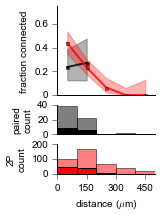

In [100]:
df=Sst
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df[df.y_pia<=330]
column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23sst_l23pyr_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23sst_l23pyr_d'][MP['l23sst_l23pyr_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,4,ymax=0.75)


probed 1:  [38 22  1  2  0]
called 1:  [9 6 0 0 0]
probed 2:  [ 64 136  47  32  14]
called 2:  [25 32  4  0  0]


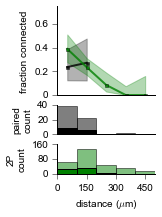

In [103]:
df=SstKv
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]

df=df[df.y_pia<=330]
column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23sst_l23pyr_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23sst_l23pyr_d'][MP['l23sst_l23pyr_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','green',r'distance ($\mu$m)',bins,4,ymax=0.75)


probed 1:  [36 35  9  0  0]
called 1:  [8 4 0 0 0]
probed 2:  [12 26  8  2  2]
called 2:  [2 4 0 0 0]


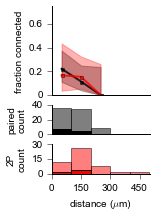

In [104]:
df=Sst
df=df[(df.post_layer==2) & (df.post_class=='interneuron') & (df.Kcluster==1)]

df=df[df.y_pia<=330]
column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23sst_l23pv_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23sst_l23pv_d'][MP['l23sst_l23pv_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,3,ymax=0.75)


probed 1:  [94 95 18  2  0]
called 1:  [5 4 0 0 0]
probed 2:  [ 5 14 37 27 17]
called 2:  [0 2 0 0 0]


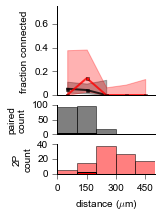

In [107]:
df=Sst

df=df[df.post_reporter=='positive']

df=df[df.post_layer==2]

column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23sst_l23sst_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23sst_l23sst_d'][MP['l23sst_l23sst_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,4,ymax=0.75)
#plt.savefig('MP_SstL23sst_con.svg')

probed 1:  [94 95 18  2  0]
called 1:  [5 4 0 0 0]
probed 2:  [21 62 81 41 23]
called 2:  [1 2 0 0 0]


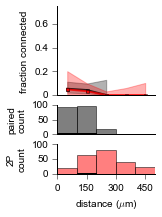

In [109]:
df=SstKv
#df=df[(df.post_class=='interneuron') & (df.Kcluster==0)]
df=df[df.post_reporter=='positive']
df=df[df.toPia<=480]
column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23sst_l23sst_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23sst_l23sst_d'][MP['l23sst_l23sst_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,4,ymax=0.75)


probed 1:  [31 30  4  0  0]
called 1:  [17  9  0  0  0]
probed 2:  [50 95 40 18  7]
called 2:  [17 17  3  1  0]


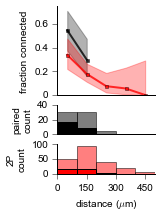

In [110]:
df=PvalbKv
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
df=df[df.y_pia<=330]
#df=df[df.pre_depth>40]
column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23pv_l23pyr_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23pv_l23pyr_d'][MP['l23pv_l23pyr_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,4,ymax=0.75)


probed 1:  [ 82 102   9   2   0]
called 1:  [30 32  0  0  0]
probed 2:  [16 35 14  4  3]
called 2:  [ 5 14  3  0  0]


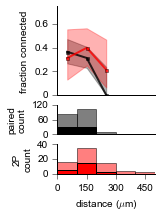

In [111]:

df=PvalbKv
df=df[(df.post_layer==2) & (df.post_reporter=='positive')]
df=df[df.y_pia<=330]

column_name='xyz_dist'
calls=['inhibitory']
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df[df['cnx'].isin(probed_calls)][column_name]
bins=np.arange(0,501,100)
probed1=MP['l23pv_l23pv_d']*1e6
probed2=df[df['cnx'].isin(probed_calls)][column_name]
cnx1=MP['l23pv_l23pv_d'][MP['l23pv_l23pv_syn']]*1e6
cnx2=df[df['cnx'].isin(calls)][column_name]

summary_dict=opto.plotFrac_wHist2(probed1,cnx1,'paired\ncount','black',probed2,cnx2,'2P\ncount','red',r'distance ($\mu$m)',bins,4,ymax=0.75)


Text(0.5, 0, 'horizontal distance ($\\mu$m)')

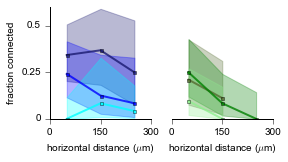

In [114]:

bins=np.arange(0,301,100)
mp=9
fs=10
y_max=0.6


Sst_L23fsi=SstKv[(SstKv.Kcluster==1) & (SstKv.post_layer==2)]
Pvalb_L23fsi=PvalbKv[(PvalbKv.Kcluster==1) & (PvalbKv.post_layer==2)]

L23Sst_L23fsi=Sst_L23fsi[Sst_L23fsi.y_pia<330]
L23Pvalb_L23fsi=Pvalb_L23fsi[Pvalb_L23fsi.y_pia<330]
L4Sst_L23fsi=Sst_L23fsi[(Sst_L23fsi.y_pia>330) & (Sst_L23fsi.y_pia<480)]
L4Pvalb_L23fsi=Pvalb_L23fsi[(Pvalb_L23fsi.y_pia>330) & (Pvalb_L23fsi.y_pia<480)]
L5Sst_L23fsi=Sst_L23fsi[(Sst_L23fsi.y_pia>480) & (Sst_L23fsi.y_pia<750)]
L5Pvalb_L23fsi=Pvalb_L23fsi[(Pvalb_L23fsi.y_pia>480) & (Pvalb_L23fsi.y_pia<750)]


L23Sst_L23fsi_lat=opto.connectivity_profile(L23Sst_L23fsi, 'abs_x',bins)
L23Pvalb_L23fsi_lat=opto.connectivity_profile(L23Pvalb_L23fsi, 'abs_x',bins)
L4Sst_L23fsi_lat=opto.connectivity_profile(L4Sst_L23fsi, 'abs_x',bins)
L4Pvalb_L23fsi_lat=opto.connectivity_profile(L4Pvalb_L23fsi, 'abs_x',bins)
L5Sst_L23fsi_lat=opto.connectivity_profile(L5Sst_L23fsi, 'abs_x',bins)
L5Pvalb_L23fsi_lat=opto.connectivity_profile(L5Pvalb_L23fsi, 'abs_x',bins)

gskw = dict(width_ratios=[1,1], wspace=0.2) #

gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
fig = plt.figure(figsize=(4,2))

ax1=fig.add_subplot(gs[0])


opto.rate_ci_probed_cnx_x(ax1, 'midnightblue', L23Pvalb_L23fsi_lat['midX'], L23Pvalb_L23fsi_lat['probed_hist'], L23Pvalb_L23fsi_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax1, 'blue', L4Pvalb_L23fsi_lat['midX'], L4Pvalb_L23fsi_lat['probed_hist'], L4Pvalb_L23fsi_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax1, 'cyan', L5Pvalb_L23fsi_lat['midX'], L5Pvalb_L23fsi_lat['probed_hist'], L5Pvalb_L23fsi_lat['inh_hist'], min_probed=mp)



ax1.axis([0,300,0,y_max])
ax1.yaxis.set_ticks([0,0.25,0.5])

ax1.set_xlabel(r'horizontal offset ($\mu$m)', fontsize=fs, fontname=font)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax1.xaxis.set_ticks([0,150,300])
ax1.set_ylabel('fraction connected', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)
ax2=fig.add_subplot(gs[1])

opto.rate_ci_probed_cnx_x(ax2, 'darkolivegreen', L23Sst_L23fsi_lat['midX'], L23Sst_L23fsi_lat['probed_hist'], L23Sst_L23fsi_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'green', L4Sst_L23fsi_lat['midX'], L4Sst_L23fsi_lat['probed_hist'], L4Sst_L23fsi_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'lightgreen', L5Sst_L23fsi_lat['midX'], L5Sst_L23fsi_lat['probed_hist'], L5Sst_L23fsi_lat['inh_hist'], min_probed=mp)



ax2.axis([0,300,0,y_max])
ax2.axes.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([0,150,300])
ax2.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)
#plt.savefig('inh_cnx_toFSI_lat_off.svg')

Text(0.5, 0, 'horizontal distance ($\\mu$m)')

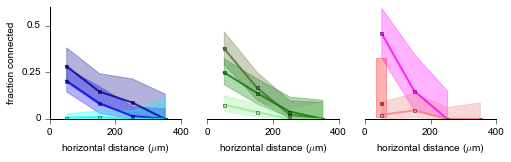

In [116]:

x_max=400
bins=np.arange(0,x_max+1,100)
mp=9
fs=10
y_max=0.6
SstAi_L23pyr=SstAi167[(SstAi167.post_class=='pyramidal') & (SstAi167.post_layer==2)]
SstKv_L23pyr=SstKv[(SstKv.post_class=='pyramidal') & (SstKv.post_layer==2)]
Pvalb_L23pyr=PvalbKv[(PvalbKv.post_class=='pyramidal') & (PvalbKv.post_layer==2)]
Sst_L23int=Sst[(Sst.post_class=='interneuron') & (Sst.post_layer==2)]
Pvalb_L23int=PvalbKv[(PvalbKv.post_class=='interneuron') & (PvalbKv.post_layer==2)]

L23SstAi_L23pyr=SstAi_L23pyr[SstAi_L23pyr.y_pia<330]
L23SstKv_L23pyr=SstKv_L23pyr[SstKv_L23pyr.y_pia<330]
L23Pvalb_L23pyr=Pvalb_L23pyr[Pvalb_L23pyr.y_pia<330]

L4SstAi_L23pyr=SstAi_L23pyr[(SstAi_L23pyr.y_pia>330) & (SstAi_L23pyr.y_pia<480)]
L4SstKv_L23pyr=SstKv_L23pyr[(SstKv_L23pyr.y_pia>330) & (SstKv_L23pyr.y_pia<480)]
L4Pvalb_L23pyr=Pvalb_L23pyr[(Pvalb_L23pyr.y_pia>330) & (Pvalb_L23pyr.y_pia<480)]

L5SstAi_L23pyr=SstAi_L23pyr[(SstAi_L23pyr.y_pia>480) & (SstAi_L23pyr.y_pia<750)]
L5SstKv_L23pyr=SstKv_L23pyr[(SstKv_L23pyr.y_pia>480) & (SstKv_L23pyr.y_pia<750)]
L5Pvalb_L23pyr=Pvalb_L23pyr[(Pvalb_L23pyr.y_pia>480) & (Pvalb_L23pyr.y_pia<750)]

Pvalb_L23pyr_lat=opto.connectivity_profile(Pvalb_L23pyr,'abs_x',bins)
SstKv_L23pyr_lat=opto.connectivity_profile(SstKv_L23pyr,'abs_x',bins)

L23SstAi_L23pyr_lat=opto.connectivity_profile(L23SstAi_L23pyr, 'abs_x',bins)
L23SstKv_L23pyr_lat=opto.connectivity_profile(L23SstKv_L23pyr, 'abs_x',bins)
L23Pvalb_L23pyr_lat=opto.connectivity_profile(L23Pvalb_L23pyr, 'abs_x',bins)

L4SstAi_L23pyr_lat=opto.connectivity_profile(L4SstAi_L23pyr, 'abs_x',bins)
L4SstKv_L23pyr_lat=opto.connectivity_profile(L4SstKv_L23pyr, 'abs_x',bins)
L4Pvalb_L23pyr_lat=opto.connectivity_profile(L4Pvalb_L23pyr, 'abs_x',bins)

L5SstAi_L23pyr_lat=opto.connectivity_profile(L5SstAi_L23pyr, 'abs_x',bins)
L5SstKv_L23pyr_lat=opto.connectivity_profile(L5SstKv_L23pyr, 'abs_x',bins)
L5Pvalb_L23pyr_lat=opto.connectivity_profile(L5Pvalb_L23pyr, 'abs_x',bins)

gskw = dict(width_ratios=[1,1,1], wspace=0.2) #

gs = matplotlib.gridspec.GridSpec(1,3, **gskw)
fig = plt.figure(figsize=(8,2))

ax1=fig.add_subplot(gs[0])


opto.rate_ci_probed_cnx_x(ax1, 'darkblue', L23Pvalb_L23pyr_lat['midX'], L23Pvalb_L23pyr_lat['probed_hist'], L23Pvalb_L23pyr_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax1, 'blue', L4Pvalb_L23pyr_lat['midX'], L4Pvalb_L23pyr_lat['probed_hist'], L4Pvalb_L23pyr_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax1, 'cyan', L5Pvalb_L23pyr_lat['midX'], L5Pvalb_L23pyr_lat['probed_hist'], L5Pvalb_L23pyr_lat['inh_hist'], min_probed=mp)



ax1.axis([0,x_max,0,y_max])
ax1.yaxis.set_ticks([0,0.25,0.5])

ax1.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax1.xaxis.set_ticks([0,x_max/2,x_max])
ax1.set_ylabel('fraction connected', fontsize=fs, fontname=font)
ax1.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)

ax2=fig.add_subplot(gs[1])
opto.rate_ci_probed_cnx_x(ax2, 'darkolivegreen', L23SstKv_L23pyr_lat['midX'], L23SstKv_L23pyr_lat['probed_hist'], L23SstKv_L23pyr_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'green', L4SstKv_L23pyr_lat['midX'], L4SstKv_L23pyr_lat['probed_hist'], L4SstKv_L23pyr_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'lightgreen', L5SstKv_L23pyr_lat['midX'], L5SstKv_L23pyr_lat['probed_hist'], L5SstKv_L23pyr_lat['inh_hist'], min_probed=mp)
ax2.axis([0,x_max,0,y_max])
ax2.axes.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax2.xaxis.set_ticks([0,x_max/2,x_max])
ax2.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)

ax3=fig.add_subplot(gs[2])
opto.rate_ci_probed_cnx_x(ax3, 'magenta', L23SstAi_L23pyr_lat['midX'], L23SstAi_L23pyr_lat['probed_hist'], L23SstAi_L23pyr_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax3, 'red', L4SstAi_L23pyr_lat['midX'], L4SstAi_L23pyr_lat['probed_hist'], L4SstAi_L23pyr_lat['inh_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax3, 'lightcoral', L5SstAi_L23pyr_lat['midX'], L5SstAi_L23pyr_lat['probed_hist'], L5SstAi_L23pyr_lat['inh_hist'], min_probed=mp)
ax3.axis([0,x_max,0,y_max])
ax3.axes.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax3.xaxis.set_ticks([0,x_max/2,x_max])
ax3.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=fs, fontname=font)



/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/2219383839.py:30: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  current_cmap.set_bad(color='black')
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/2219383839.py:31: RuntimeWarning: invalid value encountered in true_divide
  H_prob=H_cnx/H


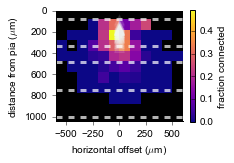

In [117]:
#df=exc_L23_pyr.dropna(subset=['y_pia'])

df=standard_df
df=df[df.presynapticCre.isin(['Pvalb', 'Sst'])]
df=df[(df.post_layer==2) & (df.post_class=='pyramidal')]
inh_L23pyr=df
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df_probed=df[df.cnx.isin(probed_calls)]
df_cnx=df[df.cnx=='inhibitory']
min_x=-600
max_x=600
min_y=80
max_y=1080
binsize_x=100
binsize_y=100
xedges = range(min_x,max_x+1,binsize_x)
yedges = range(min_y,max_y+1,binsize_y)

H, xedges, yedges = np.histogram2d(df_probed.x_ap, df_probed.y_pia, bins=(xedges, yedges))

threshold=H >4
H=H*threshold
H = H.T
H_cnx, xedges, yedges = np.histogram2d(df_cnx.x_ap,df_cnx.y_pia, bins=(xedges, yedges))

H_cnx=H_cnx*threshold
H_cnx = H_cnx.T
fig, ax = plt.subplots()
current_cmap = matplotlib.cm.plasma
current_cmap.set_bad(color='black')
H_prob=H_cnx/H
plt.imshow(H_prob, interpolation='nearest',filterrad=1, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)

plt.xlabel(r'horizontal offset ($\mu$m)', fontsize=10, fontname='arial')
plt.ylabel(r'distance from pia ($\mu$m)', fontsize=10, fontname='arial')
plt.axis([min_x, max_x, 1040, 0])
ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=10, direction='out')
plt.yticks(fontname = "arial")
plt.xticks([-500,-250,0,250,500],fontname= "arial")

plt.plot([-600,600],[80,80], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[330,330], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[480,480], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[750,750], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[1000,1000], c='white', ls='dashed', lw=3, alpha=0.7)

cb=plt.colorbar(fraction=0.04, pad=0.05)
cb.set_label('fraction connected', fontsize=10, fontname='arial')
cb.ax.tick_params(labelsize=10)

tick_locator = mpl.ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
cells=df.groupby(['exp_id', 'headstage']).toPia.mean()
for cell in cells:
    plt.scatter(0,cell, marker='^', color='white', alpha=0.05, s=100)


fig.set_figheight(2.5)
fig.set_figwidth(2.5)
#plt.savefig('inh_cnx_prob_heat2x2.svg')

/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/295108451.py:25: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  current_cmap.set_bad(color='black')
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/295108451.py:26: RuntimeWarning: invalid value encountered in true_divide
  H_prob=H_cnx/H


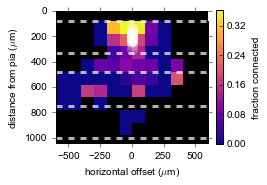

In [118]:
df=exc_L23_int.dropna(subset=['y_pia'])


probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df_probed=df[df.cnx.isin(probed_calls)]
df_cnx=df[df.cnx=='excitatory']
min_x=-600
max_x=600
min_y=80
max_y=1080
binsize_x=100
binsize_y=100
xedges = range(min_x,max_x+1,binsize_x)
yedges = range(min_y,max_y+1,binsize_y)

H, xedges, yedges = np.histogram2d(df_probed.x_ap, df_probed.y_pia, bins=(xedges, yedges))
threshold=H >4
H=H*threshold
H = H.T
H_cnx, xedges, yedges = np.histogram2d(df_cnx.x_ap,df_cnx.y_pia, bins=(xedges, yedges))
H_cnx=H_cnx*threshold
H_cnx = H_cnx.T
fig, ax = plt.subplots()
current_cmap = matplotlib.cm.plasma
current_cmap.set_bad(color='black')
H_prob=H_cnx/H
plt.imshow(H_prob, interpolation='nearest',filterrad=1, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)

plt.xlabel(r'horizontal offset ($\mu$m)', fontsize=10, fontname='arial')
plt.ylabel(r'distance from pia ($\mu$m)', fontsize=10, fontname='arial')
plt.axis([min_x, max_x, 1040, 0])
ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=10, direction='out')
plt.yticks(fontname = "arial")
plt.xticks([-500,-250,0,250,500],fontname= "arial")

plt.plot([-600,600],[80,80], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[330,330], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[480,480], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[750,750], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[1000,1000], c='white', ls='dashed', lw=3, alpha=0.7)

cb=plt.colorbar(fraction=0.04, pad=0.05)
tick_locator = mpl.ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label('fraction connected', fontsize=10, fontname='arial')
cb.ax.tick_params(labelsize=10)
cells=df.groupby(['exp_id', 'headstage']).toPia.mean()
for cell in cells:
    plt.scatter(0,cell, marker='o', color='white', alpha=0.2, s=100)
fig.set_figheight(3)
fig.set_figwidth(3)


/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/1351687792.py:28: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  current_cmap.set_bad(color='black')
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_51683/1351687792.py:29: RuntimeWarning: invalid value encountered in true_divide
  H_prob=H_cnx/H


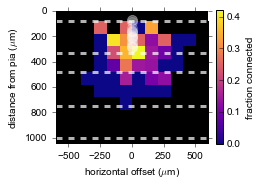

In [119]:
#df=exc_L23_pyr.dropna(subset=['y_pia'])

df=standard_df
df=df[df.presynapticCre.isin(['Pvalb', 'Sst'])]
df=df[(df.post_layer==2) & (df.Kcluster==1)]
inh_L23fsi=df
probed_calls=['no cnx', 'excitatory', 'inhibitory', 'tbd excitatory', 'tbd inhibitory', 'tbd latency']
df_probed=df[df.cnx.isin(probed_calls)]
df_cnx=df[df.cnx=='inhibitory']
min_x=-600
max_x=600
min_y=80
max_y=1080
binsize_x=100
binsize_y=100
xedges = range(min_x,max_x+1,binsize_x)
yedges = range(min_y,max_y+1,binsize_y)

H, xedges, yedges = np.histogram2d(df_probed.x_ap, df_probed.y_pia, bins=(xedges, yedges))
threshold=H >2
H=H*threshold
H = H.T
H_cnx, xedges, yedges = np.histogram2d(df_cnx.x_ap,df_cnx.y_pia, bins=(xedges, yedges))
H_cnx=H_cnx*threshold
H_cnx = H_cnx.T
fig, ax = plt.subplots()
current_cmap = matplotlib.cm.plasma
current_cmap.set_bad(color='black')
H_prob=H_cnx/H
plt.imshow(H_prob, interpolation='nearest',filterrad=1, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=current_cmap)

plt.xlabel(r'horizontal offset ($\mu$m)', fontsize=10, fontname='arial')
plt.ylabel(r'distance from pia ($\mu$m)', fontsize=10, fontname='arial')
plt.axis([min_x, max_x, 1040, 0])
ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=10, direction='out')
plt.yticks(fontname = "arial")
plt.xticks([-500,-250,0,250,500],fontname= "arial")

plt.plot([-600,600],[80,80], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[330,330], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[480,480], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[750,750], c='white', ls='dashed', lw=3, alpha=0.7)
plt.plot([-600,600],[1000,1000], c='white', ls='dashed', lw=3, alpha=0.7)

cb=plt.colorbar(fraction=0.04, pad=0.05)
cb.set_label('fraction connected', fontsize=10, fontname='arial')
cb.ax.tick_params(labelsize=10)

tick_locator = mpl.ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
cells=df.groupby(['exp_id', 'headstage']).toPia.mean()
for cell in cells:
    plt.scatter(0,cell, marker='o', color='white', alpha=0.2, s=100)
fig.set_figheight(3)
fig.set_figwidth(3)


/Users/travish/Desktop/2p_opto_nbs/opto_util.py:22: RuntimeWarning: invalid value encountered in true_divide
  return {'midX':midPoints(x),'probed_hist':probed_hist,'exc_hist':exc_hist,'inh_hist':inh_hist,'direct':direct_hist,
/Users/travish/opt/miniconda3/lib/python3.9/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:24: RuntimeWarning: invalid value encountered in true_divide
  
/Users/travish/Desktop/2p_opto_nbs/opto_util.py:26: RuntimeWarning: invalid value encountered in true_divide
  def hist_of_call(df, call, column_name, bins):


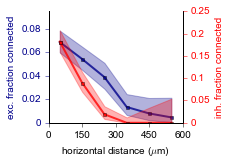

In [124]:
bins=np.arange(-601,601,100)
mp=9
L23inh_L23pyr=inh_L23pyr
L23exc_L23pyr=exc_L23_pyr
L23inh_connect_lat=opto.connectivity_profile(L23inh_L23pyr,'abs_x',bins)
L23exc_connect_lat=opto.connectivity_profile(L23exc_L23pyr,'abs_x',bins)
fig,ax=plt.subplots()
ax2=ax.twinx()
opto.rate_ci_probed_cnx_x(ax, 'darkblue', L23exc_connect_lat['midX'], L23exc_connect_lat['probed_hist'], L23exc_connect_lat['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax2, 'red', L23inh_connect_lat['midX'], L23inh_connect_lat['probed_hist'], L23inh_connect_lat['inh_hist'], min_probed=mp)
ax.set_ylim([0,0.095])
ax2.tick_params(axis='y', which='both', labelsize=10, direction='out',colors='red')
ax.tick_params(axis='x', which='both', labelsize=10, direction='out')
ax.tick_params(axis='y', which='both', labelsize=10, direction='out',colors='darkblue')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.label.set_color('darkblue')
ax2.yaxis.label.set_color('red')
ax2.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylabel('exc. fraction connected')
ax2.set_ylabel('inh. fraction connected')
ax.set_xlabel('horizontal distance (' r'$\mu$'+'m)')
ax.axes.xaxis.set_visible(True)
fig.set_figheight(2)
fig.set_figwidth(2.4)


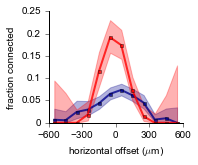

In [123]:
bins=np.arange(-601,601,100)
mp=9

L23inh_connect_lat=opto.connectivity_profile(L23inh_L23pyr,'x_ap',bins)
L23exc_connect_lat=opto.connectivity_profile(L23exc_L23pyr,'x_ap',bins)
fig,ax=plt.subplots()

opto.rate_ci_probed_cnx_x(ax, 'darkblue', L23exc_connect_lat['midX'], L23exc_connect_lat['probed_hist'], L23exc_connect_lat['exc_hist'], min_probed=mp)
opto.rate_ci_probed_cnx_x(ax, 'red', L23inh_connect_lat['midX'], L23inh_connect_lat['probed_hist'], L23inh_connect_lat['inh_hist'], min_probed=mp)
ax.set_ylabel('fraction connected')
ax.set_xlabel('horizontal offset (' r'$\mu$'+'m)')

ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.axes.xaxis.set_visible(True)
fig.set_figheight(2)
fig.set_figwidth(2.4)


In [125]:
MP_2P_comp=pd.read_csv('MP_2P_comp_table.csv')

In [173]:
print np.sum(MP_2P_comp.MP_probed)
print np.sum(MP_2P_comp.twoP_probed)

781
1238


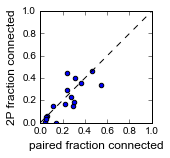

In [126]:
df=MP_2P_comp
fig, ax = plt.subplots()
ax.scatter(df.MP_prob, df.twoP_prob)

ax.plot([0,1],[0,1], c='black', ls='dashed')
plt.xlabel('paired fraction connected', fontsize=12)
plt.ylabel('2P fraction connected', fontsize=12)
plt.axis([0,1,0,1])
fig.set_figheight(2)
fig.set_figwidth(2)


In [127]:
MP_2P_comp

,cnx_class,MP_probed,MP_cnx,twoP_probed,twoP_cnx,MP_prob,twoP_prob
0,L23exc_L23exc,135,8,205,12,0.059259,0.058537
1,L23exc_L23exc200,48,2,312,3,0.041667,0.009615
2,L23exc_L23pv,28,13,41,19,0.464286,0.463415
3,L23exc_L23pv200,27,8,60,9,0.296296,0.150000
4,L23exc_L23vip,25,6,24,7,0.240000,0.291667
5,L23exc_L23vip200,28,4,11,0,0.142857,0.000000
6,L23sst_L23exc,38,9,101,45,0.236842,0.445545
7,L23sst_L23exc200,22,6,167,38,0.272727,0.227545
8,L23sst_L23pv,36,8,12,2,0.222222,0.166667
9,L23sst_L23pv200,35,4,26,4,0.114286,0.153846


In [129]:
print (stats.pearsonr(df.MP_prob, df.twoP_prob))
print (stats.spearmanr(df.MP_prob, df.twoP_prob))

(0.7908931692211648, 0.0002642297981838401)
SpearmanrResult(correlation=0.7941176470588236, pvalue=0.0002391909276256312)


In [130]:
p_vals=[]
min_probed=[]
for row in df.index:
    MP_cnx=df['MP_cnx'][row]
    MP_nocnx=df['MP_probed'][row]-df['MP_cnx'][row]
    twoP_cnx=df['twoP_cnx'][row]
    twoP_nocnx=df['twoP_probed'][row]-df['twoP_cnx'][row]
    cnx_fisher=stats.fisher_exact([[MP_cnx, MP_nocnx],[twoP_cnx, twoP_nocnx]])
    p_vals=np.append(p_vals,cnx_fisher[1])
    
    min_probed_i=np.min([df['MP_probed'][row], df['twoP_probed'][row]])
    min_probed=np.append(min_probed, min_probed_i)

df['fisher_p']=p_vals
df['min_probed']=min_probed

In [131]:
df

,cnx_class,MP_probed,MP_cnx,twoP_probed,twoP_cnx,MP_prob,twoP_prob,fisher_p,min_probed
0,L23exc_L23exc,135,8,205,12,0.059259,0.058537,1.000000,135.0
1,L23exc_L23exc200,48,2,312,3,0.041667,0.009615,0.133801,48.0
2,L23exc_L23pv,28,13,41,19,0.464286,0.463415,1.000000,28.0
3,L23exc_L23pv200,27,8,60,9,0.296296,0.150000,0.145391,27.0
4,L23exc_L23vip,25,6,24,7,0.240000,0.291667,0.753614,24.0
5,L23exc_L23vip200,28,4,11,0,0.142857,0.000000,0.309115,11.0
6,L23sst_L23exc,38,9,101,45,0.236842,0.445545,0.031458,38.0
7,L23sst_L23exc200,22,6,167,38,0.272727,0.227545,0.600734,22.0
8,L23sst_L23pv,36,8,12,2,0.222222,0.166667,1.000000,12.0
9,L23sst_L23pv200,35,4,26,4,0.114286,0.153846,0.713381,26.0


In [132]:

print (sm.stats.multipletests(p_vals, alpha=0.25, method='fdr_bh', is_sorted=False, returnsorted=False))
multi_correct_p=sm.stats.multipletests(p_vals, alpha=0.25, method='fdr_bh', is_sorted=False, returnsorted=False)[1]

(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([1.        , 0.58156245, 1.        , 0.58156245, 1.        ,
       0.82430609, 0.50332374, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.58156245, 0.66588467, 1.        ,
       0.93322822]), 0.017819451444741063, 0.015625)


In [133]:
multi_correct_p

array([1.        , 0.58156245, 1.        , 0.58156245, 1.        ,
       0.82430609, 0.50332374, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.58156245, 0.66588467, 1.        ,
       0.93322822])

In [134]:
df['p_multiple_comp']=multi_correct_p

In [135]:
df.to_csv('MP_2P_comparisons_with_pvals.csv')

In [136]:
#np.polyfit(df.MP_prob, df.twoP_prob, 1, full=True)
p, V = np.polyfit(df.MP_prob, df.twoP_prob, 1, cov=True)

print("x_1: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("x_2: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

x_1: 0.8261353794368266 +/- 0.17083951458889685
x_2: 0.01596988019641115 +/- 0.046939249968617466


0.8261353794368266 0.01596988019641115


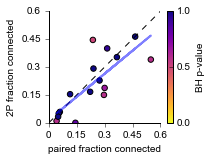

In [138]:
fig, ax = plt.subplots()
m, b = np.polyfit(df.MP_prob, df.twoP_prob, 1)
print (m, b)
probs=ax.scatter(df.MP_prob, df.twoP_prob, c=df.p_multiple_comp, cmap='plasma_r', vmin=0, vmax=1,s=30) ##, s=df.min_probed

cb=plt.colorbar(probs, ticks=[0,0.5,1])

cb.set_label('BH p-value', fontsize=10, fontname='arial')
cb.ax.tick_params(labelsize=10)
ax.plot([0,1],[0,1], c='black', ls='dashed')
ax.plot(df.MP_prob, m*df.MP_prob + b, lw=2, alpha=0.5)
plt.xlabel('paired fraction connected')
plt.ylabel('2P fraction connected')
plt.axis([0,0.6,0,0.6])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.tick_params(axis='both', which='both', labelsize=10, direction='out')
fig.set_figheight(2)
fig.set_figwidth(2.5)


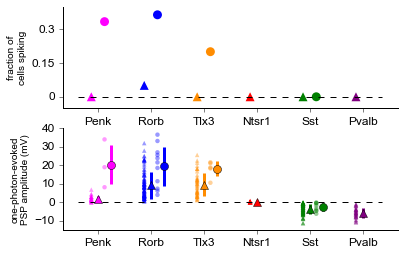

In [141]:
df1=Penk_L23pyr.dropna(subset=['oneP'])
df1=df1[df1.post_reporter=='negative']
df2=Penk_L23fsi.dropna(subset=['oneP'])
df3=Rorb_L23pyr.dropna(subset=['oneP'])
df4=Rorb_L23fsi.dropna(subset=['oneP'])
df5=Tlx3Kv_L23pyr.dropna(subset=['oneP'])
df6=Tlx3_L23fsi.dropna(subset=['oneP'])
df7=Ntsr1Ai_L23pyr.dropna(subset=['oneP'])
df8=Ntsr1Ai_L23fsi
df9=Sst_L23pyr.dropna(subset=['oneP'])
df10=Sst_L23int
df10=df10[df10.Kcluster==1].dropna(subset=['oneP'])
df11=PvalbKv_L23pyr.dropna(subset=['oneP'])
df_list=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]
color=['magenta','magenta','blue','blue','darkorange','darkorange','red','red','green','green','purple']
markers=['^','o','^','o','^','o','^','o','^','o','^']
tick_labels=['Penk to L2/3 pyr', 'Penk to L2/3 FSI', 'Rorb to L2/3 pyr', 'Rorb to L2/3 fsi',
            'Tlx3 to L2/3 pyr', 'Tlx3 to L2/3 fsi', 'Ntsr1 to L2/3 pyr']
x_loc=[1,2,5,6,9,10,13,14,17,18,21,22]
i=0
small_s=20
big_s=8
fig,axes=plt.subplots(2,1,sharex=True)
ax0=axes[0]
ax1=axes[1]
for df in df_list:
    grouped=df.groupby(['exp_id', 'headstage'])
    amps=[]
    spikes=[]
    for name, group in grouped:
        amps.append(group.oneP.mean())
        spikes.append(group.oneP_spike.iloc[0])
        
    spike_count=np.nansum(spikes)
    total= np.shape(amps)[0]
    marker=np.ones(total)*x_loc[i]
    
    if total>=1:
        frac_spike=float(spike_count)/total
        ax0.scatter(marker[0],frac_spike,c=color[i], marker=markers[i],s=small_s*4,edgecolors='None')
        ax1.scatter(marker,amps,c=color[i], marker=markers[i],alpha=0.4,s=small_s,edgecolors='None')
        avg=np.mean(amps)
        sd=np.std(amps)
        #print (i,avg,sd)
        ax1.errorbar(x_loc[i]+0.5,avg,yerr=sd, color=color[i], marker=markers[i],elinewidth=3, capsize=0, markersize=big_s)
    i+=1
ax0.tick_params(axis='both', which='both', labelsize=12, direction='out')
ax1.tick_params(axis='both', which='both', labelsize=12, direction='out')

plt.yticks(fontname = "arial")
plt.xticks([1.5,5.5,9.5,13.5,17.5,21.5], ['Penk','Rorb', 'Tlx3', 'Ntsr1', 'Sst','Pvalb'], fontname= "arial")
ax0.plot([0,23],[0,0],ls='dashed', c='black')
ax1.plot([0,23],[0,0],ls='dashed', c='black')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax0.set_ylabel("fraction of\ncells spiking")
ax0.set_ylim([-0.05,0.4])
ax0.yaxis.set_major_locator(plt.MaxNLocator(4))

ax0.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax1.set_ylim([-15,40])
ax1.set_ylabel("one-photon-evoked\nPSP amplitude (mV)")
fig.set_figheight(4)

fig.set_figwidth(6)

plt.savefig('oneP_amplitudes_revis.svg')

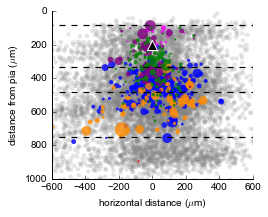

In [142]:
s_factor=60
no_cnx_s=20

fig, ax = plt.subplots()
df_list=[Rorb_L23pyr,Tlx3Kv_L23pyr,Penk_L23pyr,Ntsr1Ai_L23pyr,Pvalb_L23pyr,Sst_L23pyr]
colors=['blue','darkorange','magenta','red','purple','green']
cnx_calls=['excitatory','excitatory','excitatory','excitatory','inhibitory','inhibitory']
for df,color,call in zip(df_list,colors,cnx_calls):    
    cnx=df[df.cnx==call]
    cnx=cnx.dropna(subset=['peakOfAvg'])
    no_cnx=df[df.cnx=='no cnx']
    plt.scatter(no_cnx.x_ap, no_cnx.y_pia,c='grey', alpha=0.2,edgecolor='none',s=no_cnx_s,zorder=0)
    plt.scatter(cnx.x_ap, cnx.y_pia,c=color,alpha=0.8,edgecolor='none',s=abs(cnx.peakOfAvg*s_factor),zorder=1)
plt.scatter([0],[200],marker='^',c='black',edgecolor='white',s=100,zorder=2)
opto.layer_borders(ax)

plt.axis([-600,600,1000,0])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel(r'horizontal distance ($\mu$m)', fontsize=10, fontname='arial')

ax.set_ylabel(r'distance from pia ($\mu$m)', fontsize=10, fontname='arial')

fig.set_figheight(3)
fig.set_figwidth(3.6)
